# base

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
import joblib
import pickle

In [2]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\GOTHICBI.TTF',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\GIL_____.TTF',
 'C:\\Windows\\Fonts\\PER_____.TTF',
 'C:\\Windows\\Fonts\\IMPRISHA.TTF',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\courbd.ttf',
 'C:\\Windows\\Fonts\\RAGE.TTF',
 'C:\\Windows\\Fonts\\tahomabd.ttf',
 'C:\\Windows\\Fonts\\ROCKI.TTF',
 'C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\LCALLIG.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\LFAX.TTF',
 'C:\\Windows\\Fonts\\BOD_I.TTF',
 'C:\\Windows\\Fonts\\GILBI___.TTF',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\cambriab.ttf',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\ITCEDSCR.TTF',
 'C:\\Users\\NT551XCJ\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubWorld Dotum Medium.ttf',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C

In [3]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
kfold = KFold( n_splits = 5, random_state=1234, shuffle=True)

# 전처리 2분류 언더 샘플링

In [4]:
# csv 불러오기 
path = "전처리 최종 4_10명.csv"
ml_df = pd.read_csv(path, encoding = 'cp949')

In [8]:
ml_df = ml_df[ml_df['sales'] > 500000000].copy()
def label_sales(num):
    if num >= 3000000000:
        return 0
    else:
        return 1

ml_df['sales_N'] = ml_df['sales'].apply(label_sales)
ml_df = ml_df.replace(999, -999)

columns_to_delete = [
    'Smile_Confidence_',
    'Eyeglasses_Confidence_',
    'Sunglasses_Confidence_',
    'Gender_Confidence_',
    'Beard_Confidence_',
    'Mustache_Confidence_',
    'EyesOpen_Confidence_',
    'MouthOpen_Confidence_',
    'FaceOccluded_Confidence_',
    'EyeDirection_Confidence_',
    'Landmarks_',
    'Confidence_0',
    'Confidence_1',
    'Confidence_2',
    'Confidence_3',
    'Confidence_4',
    'Confidence_5',
    'Confidence_6',
    'Confidence_7',
    'Confidence_8',
    'Confidence_9'
]

columns_to_delete = [col for col in ml_df.columns if any(substring in col for substring in columns_to_delete)]

ml_df.drop(columns=columns_to_delete, inplace=True)

# Genre 라벨링
df = ml_df.copy()
df.drop(columns = ['Movie_name', 'Image_name', 'Movie_type', 'Number_of_moviegoers', 'sales','Genre', 'Running_time', 'Genre_n', 'sales_N'], inplace = True)

y = ml_df.loc[:,'sales_N']

# 훈련 데이터, 평가 데이터, 훈련 데이터 정답, 평가 데이터 정답
X_train, X_val, y_train, y_val = train_test_split(
    df,
    y,
    test_size = 0.2,
    random_state= 1999
)

In [9]:
ml_df.groupby('sales_N').count()

,Movie_name,Image_name,Movie_type,SpecIal,Month,Number_of_moviegoers,sales,Genre,Genre_comedy,Genre_drama,...,part_3,part_4,part_5,part_6,part_7,part_8,part_9,part_10,part_11,part_12
sales_N,,,,,,,,,,,,,,,,,,,,,
0,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,...,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
1,952,952,952,952,952,952,952,952,952,952,...,952,952,952,952,952,952,952,952,952,952


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 3141
Columns: 267 entries, SpecIal to part_12
dtypes: float64(117), int64(150)
memory usage: 4.0 MB


In [11]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 3141
Columns: 276 entries, Movie_name to sales_N
dtypes: float64(118), int64(154), object(4)
memory usage: 4.1+ MB


In [12]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((1568, 267), (1568,), (393, 267), (393,))

# LGBM 모델 돌리기

In [13]:
def lgbc_objective( trail ) :
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate":trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth":trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "min_split_gain":trail.suggest_float("min_split_gain", 0.001, 30),
        "subsample":trail.suggest_float("subsample", 0.1,0.9),
        "colsample_bytre":trail.suggest_float("colsample_bytre", 0.1,0.9),
                'reg_alpha': trail.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trail.suggest_uniform('reg_lambda', 0.0, 10.0)
    }

    lgbc = LGBMClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( lgbc,
                         X_train, y_train,
                          cv = kfold, scoring='accuracy')

    acc_mean = scores.mean()

    return acc_mean

In [14]:
lgbc_study = optuna.create_study(direction="maximize")
lgbc_study.optimize(lgbc_objective, n_trials=200, n_jobs=-1 )

[I 2024-05-21 01:21:45,110] A new study created in memory with name: no-name-e92e523c-15f6-47ba-99f1-7aa38fbca296
[I 2024-05-21 01:21:46,693] Trial 6 finished with value: 0.6677194196292302 and parameters: {'n_estimators': 66, 'learning_rate': 0.3522295176545862, 'max_depth': 163, 'min_split_gain': 13.317986671892719, 'subsample': 0.5417433466030395, 'colsample_bytre': 0.34230036558052845, 'reg_alpha': 0.8437046984084653, 'reg_lambda': 8.763941306350688}. Best is trial 6 with value: 0.6677194196292302.
[I 2024-05-21 01:21:46,996] Trial 5 finished with value: 0.623703221342667 and parameters: {'n_estimators': 86, 'learning_rate': 0.03034650714548623, 'max_depth': 104, 'min_split_gain': 27.821308008297404, 'subsample': 0.7423646735915962, 'colsample_bytre': 0.8348520488008911, 'reg_alpha': 0.9437792258964998, 'reg_lambda': 2.3743529866942414}. Best is trial 6 with value: 0.6677194196292302.
[I 2024-05-21 01:21:49,248] Trial 2 finished with value: 0.6568954640727702 and parameters: {'n_es

In [15]:
print(lgbc_study.best_trial.values)
print(lgbc_study.best_params)

[0.6772837345597362]
{'n_estimators': 866, 'learning_rate': 0.28469930269890015, 'max_depth': 45, 'min_split_gain': 18.492145953416074, 'subsample': 0.16933867922597692, 'colsample_bytre': 0.34433489400803763, 'reg_alpha': 0.014272512998366294, 'reg_lambda': 1.8976320098421207}


In [16]:
opt_lgbc = LGBMClassifier( n_jobs=-1,
                                random_state=1234,
                                 **lgbc_study.best_params)

opt_lgbc.fit(X_train, y_train)
y_pred = opt_lgbc.predict(X_val)

[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 753, number of negative: 815
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17725
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 263
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480230 -> initscore=-0.079123
[LightGBM] [Info] Start training from score -0.079123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [17]:
lgbc_accuracy = accuracy_score(y_val, y_pred)
lgbc_precision = precision_score(y_val, y_pred, average='weighted')
lgbc_recall = recall_score(y_val, y_pred, average='weighted')
lgbc_f1 = f1_score(y_val, y_pred, average='weighted')
lgbc_classification = classification_report(y_val, y_pred)

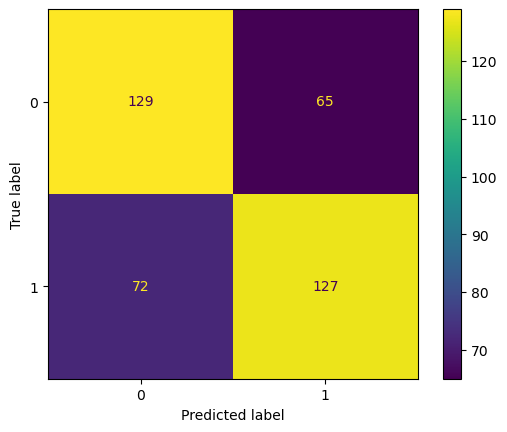

In [18]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_val, y_pred),
                      display_labels=opt_lgbc.classes_).plot()

In [19]:
opt_lgbc.feature_importances_
d = pd.DataFrame( data = opt_lgbc.feature_importances_)
d["col_name"] = df.columns
d.sort_values(by =0, ascending=False).iloc[:30]

,0,col_name
0,5,SpecIal
64,2,Gender_Value_1
22,1,Rating
42,1,Gender_Value_0
7,1,Genre_animation
36,1,BoundingBox_Top_0
174,0,Gender_Value_6
173,0,Sunglasses_Value_6
172,0,Eyeglasses_Value_6
183,0,Quality_Sharpness_6


# XGboost

In [20]:
def xgbc_objective( trail ) :
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate":trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth":trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "min_split_gain":trail.suggest_float("min_split_gain", 0.001, 30),
        "subsample":trail.suggest_float("subsample", 0.1,0.9),
        "colsample_bytre":trail.suggest_float("colsample_bytre", 0.1,0.9),
        'reg_alpha': trail.suggest_uniform('alpha', 0.0, 1.0),
        'reg_lambda': trail.suggest_uniform('lambda', 0.0, 10.0)
    }

    xgbc = XGBClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( xgbc,
                         X_train, y_train,
                          cv = kfold, scoring="accuracy")

    acc_mean = scores.mean()

    return acc_mean

In [21]:
xgbc_study = optuna.create_study(direction="maximize")
xgbc_study.optimize(xgbc_objective, n_trials=100, n_jobs=-1 )

[I 2024-05-21 01:27:08,754] A new study created in memory with name: no-name-02781a66-a60f-4c76-9d65-b6e61e5c8fc9
[I 2024-05-21 01:27:23,038] Trial 4 finished with value: 0.6498565352760423 and parameters: {'n_estimators': 12, 'learning_rate': 0.15727703267782, 'max_depth': 194, 'min_split_gain': 14.65604861380031, 'subsample': 0.8506065421741389, 'colsample_bytre': 0.14040078032265388, 'alpha': 0.9140333683975748, 'lambda': 5.660172778091837}. Best is trial 4 with value: 0.6498565352760423.
[I 2024-05-21 01:28:14,168] Trial 2 finished with value: 0.654986671007916 and parameters: {'n_estimators': 363, 'learning_rate': 0.8369139452417822, 'max_depth': 109, 'min_split_gain': 24.134855345478385, 'subsample': 0.7691981845378657, 'colsample_bytre': 0.7505862015727512, 'alpha': 0.8842970082174136, 'lambda': 5.086456720143852}. Best is trial 2 with value: 0.654986671007916.
[I 2024-05-21 01:28:21,461] Trial 6 finished with value: 0.6619808306709265 and parameters: {'n_estimators': 271, 'lear

In [22]:
print(xgbc_study.best_trial.values)
print(xgbc_study.best_params)

[0.679206772348955]
{'n_estimators': 686, 'learning_rate': 0.026945871713934935, 'max_depth': 58, 'min_split_gain': 9.782383581659, 'subsample': 0.4455393124841813, 'colsample_bytre': 0.8450546961389441, 'alpha': 0.43932748300214974, 'lambda': 9.433521316464589}


In [23]:
opt_xgbc = XGBClassifier( n_jobs=-1,
                                random_state=1999,
                                 **xgbc_study.best_params)

opt_xgbc.fit(X_train, y_train)
y_pred = opt_xgbc.predict(X_val)

C:\Users\NT551XCJ\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:00:23] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "colsample_bytre", "min_split_gain" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
xgbc_accuracy = accuracy_score(y_val, y_pred)
xgbc_precision = precision_score(y_val, y_pred, average='weighted')
xgbc_recall = recall_score(y_val, y_pred, average='weighted')
xgbc_f1 = f1_score(y_val, y_pred, average='weighted')
xgbc_classification = classification_report(y_val, y_pred)

In [25]:
opt_xgbc.feature_importances_
d = pd.DataFrame( data = opt_xgbc.feature_importances_)
d["col_name"] = df.columns
d.sort_values(by =0, ascending=False).iloc[:30]

,0,col_name
0,0.021572,SpecIal
64,0.019295,Gender_Value_1
42,0.012819,Gender_Value_0
154,0.010614,Mustache_Value_5
171,0.010501,Smile_Value_6
186,0.010426,EyeDirection_Pitch_6
225,0.010395,Pose_Pitch_8
247,0.009854,Pose_Pitch_9
251,0.009229,EyeDirection_Yaw_9
183,0.008592,Quality_Sharpness_6


# Catboost

In [26]:
cat_model = CatBoostClassifier(random_state=42,iterations=500, learning_rate= 0.01)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_val)

0:	learn: 0.6915810	total: 172ms	remaining: 1m 25s
1:	learn: 0.6902724	total: 190ms	remaining: 47.3s
2:	learn: 0.6886193	total: 210ms	remaining: 34.7s
3:	learn: 0.6871740	total: 227ms	remaining: 28.2s
4:	learn: 0.6853621	total: 247ms	remaining: 24.4s
5:	learn: 0.6839354	total: 265ms	remaining: 21.8s
6:	learn: 0.6824350	total: 283ms	remaining: 19.9s
7:	learn: 0.6812713	total: 288ms	remaining: 17.7s
8:	learn: 0.6795319	total: 308ms	remaining: 16.8s
9:	learn: 0.6783341	total: 328ms	remaining: 16.1s
10:	learn: 0.6766510	total: 346ms	remaining: 15.4s
11:	learn: 0.6754146	total: 365ms	remaining: 14.8s
12:	learn: 0.6737891	total: 384ms	remaining: 14.4s
13:	learn: 0.6722719	total: 403ms	remaining: 14s
14:	learn: 0.6708499	total: 420ms	remaining: 13.6s
15:	learn: 0.6695002	total: 438ms	remaining: 13.3s
16:	learn: 0.6678946	total: 456ms	remaining: 13s
17:	learn: 0.6666875	total: 475ms	remaining: 12.7s
18:	learn: 0.6655610	total: 493ms	remaining: 12.5s
19:	learn: 0.6641267	total: 512ms	remaining:

In [27]:
cat_accuracy = accuracy_score(y_val, y_pred)
cat_precision = precision_score(y_val, y_pred, average='weighted')
cat_recall = recall_score(y_val, y_pred, average='weighted')
cat_f1 = f1_score(y_val, y_pred, average='weighted')
cat_classification = classification_report(y_val, y_pred)

# voting

In [30]:
hard_clf = VotingClassifier(
    estimators = [("opt_XGB", opt_xgbc),
                   ("opt_LGBM",opt_lgbc),
                   ('Catboost',cat_model)],

    voting= "hard",
    n_jobs = -1
)
hard_clf.fit(X_train, y_train)
y_pred = hard_clf.predict(X_val)

hard_clf_accuracy = accuracy_score(y_val, y_pred)
hard_clf_precision = precision_score(y_val, y_pred, average='weighted')
hard_clf_recall = recall_score(y_val, y_pred, average='weighted')
hard_clf_f1 = f1_score(y_val, y_pred, average='weighted')
hard_clf_classification = classification_report(y_val, y_pred)

[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [31]:
soft_clf = VotingClassifier(
    estimators = [("opt_XGB", opt_xgbc),
                   ("opt_LGBM",opt_lgbc),
                   ('Catboost',cat_model)],
    voting= "soft",
    n_jobs = -1
)
soft_clf.fit(X_train, y_train)
y_pred = soft_clf.predict(X_val)

soft_clf_accuracy = accuracy_score(y_val, y_pred)
soft_clf_precision = precision_score(y_val, y_pred, average='weighted')
soft_clf_recall = recall_score(y_val, y_pred, average='weighted')
soft_clf_f1 = f1_score(y_val, y_pred, average='weighted')
soft_clf_classification = classification_report(y_val, y_pred)

[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


# 데이터 프레임 저장

In [32]:
team_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

In [33]:
team_metrics['Model'].append('LightGBM')
team_metrics['Accuracy'].append(lgbc_accuracy)
team_metrics['Precision'].append(lgbc_precision)
team_metrics['Recall'].append(lgbc_recall)
team_metrics['F1-score'].append(lgbc_f1)

team_metrics['Model'].append('XGBoost')
team_metrics['Accuracy'].append(xgbc_accuracy)
team_metrics['Precision'].append(xgbc_precision)
team_metrics['Recall'].append(xgbc_recall)
team_metrics['F1-score'].append(xgbc_f1)

team_metrics['Model'].append('CatBoost')
team_metrics['Accuracy'].append(cat_accuracy)
team_metrics['Precision'].append(cat_precision)
team_metrics['Recall'].append(cat_recall)
team_metrics['F1-score'].append(cat_f1)

team_metrics['Model'].append('Hard-Voting')
team_metrics['Accuracy'].append(hard_clf_accuracy)
team_metrics['Precision'].append(hard_clf_precision)
team_metrics['Recall'].append(hard_clf_recall)
team_metrics['F1-score'].append(hard_clf_f1)

team_metrics['Model'].append('Soft-Voting')
team_metrics['Accuracy'].append(soft_clf_accuracy)
team_metrics['Precision'].append(soft_clf_precision)
team_metrics['Recall'].append(soft_clf_recall)
team_metrics['F1-score'].append(soft_clf_f1)

team_metrics_df = pd.DataFrame(team_metrics)
team_metrics_df.to_csv('2분류_언더_accuracy.csv', index = False, encoding = 'cp949')

# 모델 저장

In [34]:
joblib.dump(opt_lgbc, "2분류_언더_opt_lgbc.pkl" )
joblib.dump(opt_xgbc, "2분류_언더_opt_xgbc.pkl" )
joblib.dump(cat_model, "2분류_언더_cat_model.pkl" )
joblib.dump(hard_clf, "2분류_언더_hard_clf.pkl" )
joblib.dump(soft_clf, "2분류_언더_soft_clf.pkl" )

['2분류_언더_soft_clf.pkl']

In [ ]:
# 불러오기
model_path ='/content/sample_data/opt_lgbm_이찬.pkl'
rf_backup = joblib.load(model_path)
rf_backup

In [35]:
pd.read_csv("2분류_언더_accuracy.csv")

,Model,Accuracy,Precision,Recall,F1-score
0,LightGBM,0.651399,0.651750,0.651399,0.651368
1,XGBoost,0.666667,0.668290,0.666667,0.666226
2,CatBoost,0.712468,0.712868,0.712468,0.712442
3,Hard-Voting,0.692112,0.692935,0.692112,0.691980
4,Soft-Voting,0.702290,0.703138,0.702290,0.702163
